In [115]:
# compare algorithms
# for Data processing need Pandas package
import pandas as pd

# Visualiation to your work 
from matplotlib import pyplot

# Split your dataset into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Matrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  #The number of times a word appears in a document is its Term Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

# ALl fo this are Model selection algorithm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
#Read the data
df=pd.read_csv('news.csv')

In [39]:
#Get shape of your dataset
df.shape

(6335, 4)

In [40]:
#Get first five row of your dataset
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [66]:
# check where data null or not
df.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


In [42]:
# calculate how many data are null
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [43]:
#DataFlair - Get the labels
labels=df.label
feature = df.text
feature

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [118]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(feature, labels, test_size=0.3, random_state=0)

In [119]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vector=TfidfVectorizer(stop_words='english', max_df=0.8)

#DataFlair - Fit and transform train set, transform test set
x_train=tfidf_vector.fit_transform(x_train) 
x_test=tfidf_vector.transform(x_test)

In [120]:
# checking all algorithm which algorithm given best Accuracy
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'

In [121]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
# 	print('%s: %f' % (name, cv_results.mean()))
results

[array([0.91093574, 0.9222097 , 0.89740699, 0.90417136, 0.91309255]),
 array([0.54904171, 0.54227734, 0.55693348, 0.56144307, 0.54740406]),
 array([0.81397971, 0.80721533, 0.80608794, 0.81736189, 0.79232506]),
 array([0.50281849, 0.50281849, 0.50281849, 0.50394589, 0.503386  ])]

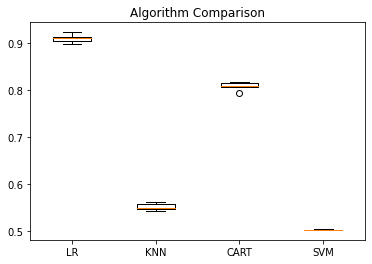

In [122]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [110]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(x_train, y_train)
m_pred = model.predict(x_test)

In [116]:
# Evaluate predictions
ac = accuracy_score(y_test, m_pred)
# print(confusion_matrix(x_test, predictions))
# print(classification_report(x_test, predictions))
ac

0.4907943187795897

a = (1,2,3,4)
a.index(5)